# Analysing and predicting climate change in Texas, US
***Writen by Duc Nguyen***

**Purpose: Analysing temperature to prectict climate change in Texas, US**

**Data: Downloaded from NOAA (National centers for environmental information) from 1920 until now.**

**To do:**
- Exploratory data analysis
    - Data summary
    - Group data by STATION
    - Missing values
    - Basic analysis of some specific features
- Statistical analyses
    - Boxplot
    - Histplot
    - Stationarity
    - Autocorrelation
    - Seasonality
- Prediction using fbprophet
- ***Summary and suggestions for WorldCover.***

In [74]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import re
import json
import pickle
import datetime
import os
import seaborn as sns

In [256]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

# Loading data

In [6]:
data_dir = '/home/duc/Duc/Data/climate/'

In [7]:
df = pd.read_csv(data_dir + 'request/data1.csv')
# Converting temperature from Fahreneit to Celsius
df['TMAX'] = (df['TMAX'] - 32)*(5/9)
df['TMIN'] = (df['TMIN'] - 32)*(5/9)

In [8]:
df.shape

(96682, 46)

In [9]:
# df.head()

# Exploratory data analysis

In [10]:
df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DAPR_ATTRIBUTES', 'DASF', 'DASF_ATTRIBUTES', 'MDPR', 'MDPR_ATTRIBUTES',
       'MDSF', 'MDSF_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW',
       'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES',
       'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06',
       'WT06_ATTRIBUTES', 'WT07', 'WT07_ATTRIBUTES', 'WT10', 'WT10_ATTRIBUTES',
       'WT11', 'WT11_ATTRIBUTES', 'WT14', 'WT14_ATTRIBUTES'],
      dtype='object')

In [11]:
pd.unique(df['STATION'])

array(['USC00416108', 'USC00416119', 'USR0000TLND', 'US1TXMRR002',
       'USC00416649', 'USC00419826', 'US1TXTI0001', 'USC00416114',
       'USC00417066', 'US1TXTI0003'], dtype=object)

In [12]:
# Quick check information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96682 entries, 0 to 96681
Data columns (total 46 columns):
STATION            96682 non-null object
NAME               96682 non-null object
LATITUDE           96682 non-null float64
LONGITUDE          96682 non-null float64
ELEVATION          96682 non-null float64
DATE               96682 non-null object
DAPR               411 non-null float64
DAPR_ATTRIBUTES    411 non-null object
DASF               3 non-null float64
DASF_ATTRIBUTES    3 non-null object
MDPR               418 non-null float64
MDPR_ATTRIBUTES    418 non-null object
MDSF               3 non-null float64
MDSF_ATTRIBUTES    3 non-null object
PRCP               89571 non-null float64
PRCP_ATTRIBUTES    89571 non-null object
SNOW               87088 non-null float64
SNOW_ATTRIBUTES    87088 non-null object
SNWD               85645 non-null float64
SNWD_ATTRIBUTES    85645 non-null object
TAVG               6251 non-null float64
TAVG_ATTRIBUTES    6251 non-null object
TMAX

## Missing values


In [13]:
for station in pd.unique(df['STATION']):
    df_test = df[df.STATION == station]
    df_test = df_test.loc[:, ['TMIN', 'TMAX', 'SNOW']]
#     df_test.head()
    print('STATION: ',station, 'length',df_test.shape[0], 'missing TMAX: ',  df_test['TMAX'].isnull().sum())
#     print('STATION: ',station, 'length',df_test.shape[0], 'missing SNOW: ',  df_test['SNOW'].isnull().sum())
   
    

STATION:  USC00416108 length 35850 missing TMAX:  345
STATION:  USC00416119 length 19560 missing TMAX:  115
STATION:  USR0000TLND length 6251 missing TMAX:  0
STATION:  US1TXMRR002 length 500 missing TMAX:  500
STATION:  USC00416649 length 2495 missing TMAX:  37
STATION:  USC00419826 length 6149 missing TMAX:  6149
STATION:  US1TXTI0001 length 1365 missing TMAX:  1365
STATION:  USC00416114 length 546 missing TMAX:  546
STATION:  USC00417066 length 23472 missing TMAX:  19386
STATION:  US1TXTI0003 length 494 missing TMAX:  494


**Many stationsbecause have NO temperature data such as US1TXMRR002, USC00419826, US1TXTI0001, USC00416114, and US1TXTI0003. We can confirm it by a boxplot **

In [14]:
# If we want to check the missing values of each colummn we run these lines
# for col in df.columns:
#     print('Total missing rows of columns',col, ':',  df[col].isnull().sum())

In [15]:
df.loc[:, ['TMIN', 'TMAX']].describe()

,TMIN,TMAX
count,67651.000000,67745.000000
mean,11.309827,24.506450
std,9.070998,9.254719
min,-24.444444,-57.777778
25%,3.888889,18.333333
50%,12.222222,25.555556
75%,19.444444,32.222222
max,35.555556,60.000000


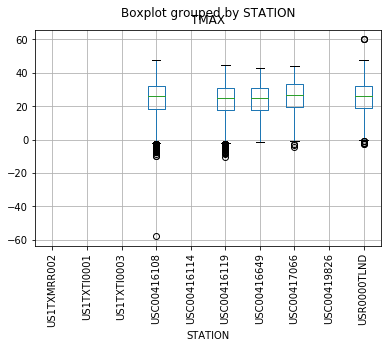

In [16]:
df.boxplot(rot = 90, by = 'STATION', column = ['TMAX'])
plt.show()

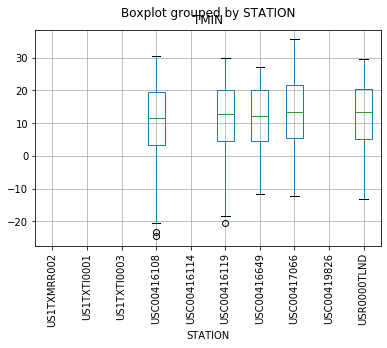

In [17]:
df.boxplot(rot = 90, by = 'STATION', column = ['TMIN'])
plt.show()

In [18]:
df_group = df.pivot_table(index = 'DATE', columns = ['STATION'], values = ['TMAX', 'TMIN'])

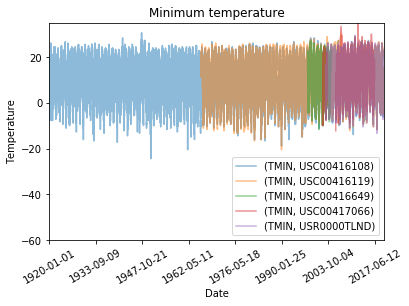

In [19]:
df_group.plot(alpha = 0.5, rot = 30, y = ['TMIN'])
# plt.legend(loc = 'top right', ncol = 2)
plt.title('Minimum temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.ylim(-60,35)
plt.legend(loc = 'lower right')
plt.show()

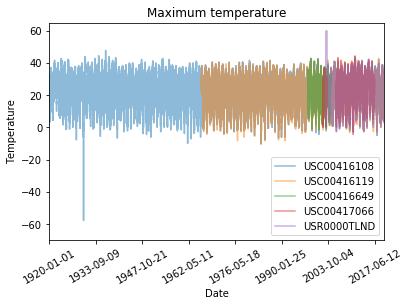

In [20]:
df_group.plot(alpha = 0.5, rot = 30, y = 'TMAX')
plt.title('Maximum temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.ylim(-70,65)
# plt.xlim(2000,5000)
plt.legend(loc = 'lower right')
plt.show()

**A boxplot of TMAX shows clear outliers of the stations USC00416108 and USR0000TLND. They were probably typos, we can remove or replace them by other values. It is reasonable to replacce it by the temperture of a day before**

**We observed that some stations have been newly installed that why, while some old ones have been removed. In addition, we see the temperature values of all stations are more or less the same. Therefore, by taking the average values from all stations, we might have a complete data of temperature for Texas **

# Temperature data

In [178]:
# Assuming temperature in Texas is the mean values of all available stations
df_Temp = pd.DataFrame(df_group['TMIN'].mean(axis = 1), columns = ['TMIN'])
df_Temp['TMAX'] = df_group['TMAX'].mean(axis = 1)
df_Temp = df_Temp.set_index(pd.DatetimeIndex(df_Temp.index))
# filling the missing data by the next values
df_Temp = df_Temp.fillna(method = 'bfill')

In [179]:
# df_Temp.info()

In [180]:
df_Temp.head()

,TMIN,TMAX
DATE,,
1920-01-01,-2.222222,10.000000
1920-01-02,-5.000000,11.111111
1920-01-03,-2.222222,12.777778
1920-01-04,-2.777778,13.888889
1920-01-05,-2.777778,6.111111


In [223]:
# create final data for analysis
df_final = df_Temp.copy()

In [224]:
# df_final.shape

In [225]:
# Replace the temperature which has the absolute value larger than 50 by the value of the previous day.
for idx in range(len(df_final['TMAX'])):
    if np.abs(df_final['TMAX'][idx]) > 50:
        df_final['TMAX'][idx] = df_final['TMAX'][idx-1]
df_final['Delta_T'] =  df_final['TMAX'] - df_final['TMIN']
    

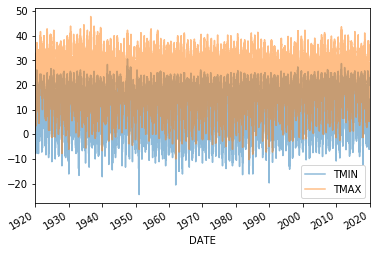

In [294]:
df_final.plot(y = ['TMIN', 'TMAX'], rot = 30, alpha = 0.5)
plt.legend(loc = 'lower right')
plt.show()

# Resampling data

It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly mean temprature from daily data.
We will focus here on downsampling, exploring how it can help us analyze our temperture data on various time scales.We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.

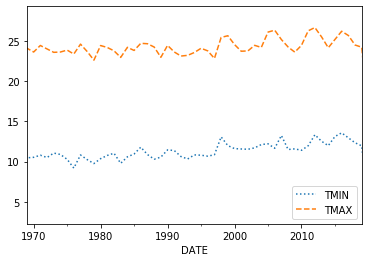

In [302]:
# Resampling data of the last 50 years.
weekly = df_final.loc[:, ['TMIN', 'TMAX']].resample('Y').mean()
weekly.plot(style = [':', '--', '-'])
plt.legend(loc = 'lower right')
plt.xlim(datetime.date(1969,1,1), datetime.date(2019,1,1))
plt.show()

***We observe a sligth increasing of both TMIN and TMAX over 100 years***

# Statistical analyses

## Basic Statistics

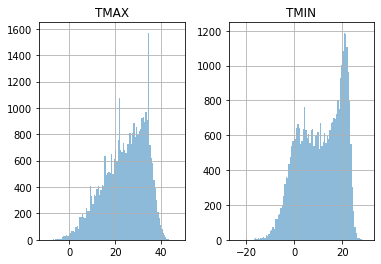

In [233]:
# Histogram plot
df_final.loc[:, ['TMIN', 'TMAX']].hist(bins = 100, alpha = 0.5)
plt.show()

**We observe 2 peaks of TMIN. Therefore, we can conclude that the temperature during the night (TMIN) is very different from winter to summer. While the (almost) Gaussion distribution of temperature during the day (TMAX) suggests that changes gradually.** 

## Stationarity
Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time.

In [306]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [307]:

#apply adf test on the series
adf_test(df_final['TMAX'])

Results of Dickey-Fuller Test:
Test Statistic                -1.609061e+01
p-value                        5.258307e-29
#Lags Used                     5.300000e+01
Number of Observations Used    3.592900e+04
Critical Value (1%)           -3.430532e+00
Critical Value (5%)           -2.861620e+00
Critical Value (10%)          -2.566813e+00
dtype: float64


***The test statistic is greater than the critical value at all levels, and p-values is very small. We, therefore, fail to reject the null hypothesis. That means means the series is NOT stationary. We can conclude that both TMIN and TMAX change over 100 years.***

## Autocorrelation
Informally, autocorrelation is the similarity between observations as a function of the time lag between them.

In [212]:
# !pip3 install git+https://github.com/statsmodels/statsmodels.git

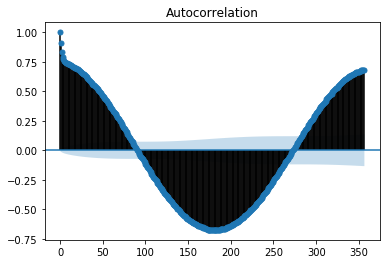

In [213]:
plot_acf(df_final['TMAX'], lags = 356)
plt.show()

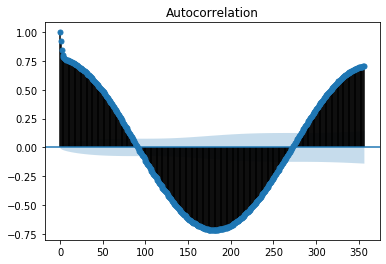

In [214]:
plot_acf(df_final['TMIN'], lags = 356)
plt.show()

**From the autocorrelation curve, we can see the correlation reduces with timelag, and we can also see the seasonality. Autocorrelation changes from postive to negative and then to postive again due to the temperature changes from winter to summer and again to winter. **

In [216]:
# plot_acf(df_final['TMAX'], lags= df_Temp.shape[0]-1)
# plt.show()

## Seasonality
Seasonality refers to periodic fluctuations. For example, temperature is high during the day/summer and low during winter/night.

In [217]:
# Add columns with year, month, and weekday name
df_final['Year'] = df_final.index.year
df_final['Month'] = df_final.index.month
df_final['Weekday Name'] = df_final.index.weekday_name

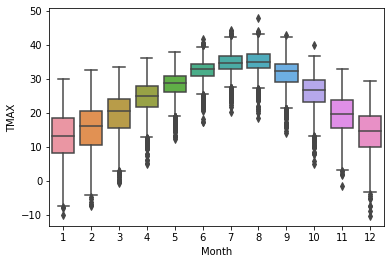

In [218]:
sns.boxplot(data= df_final, x = 'Month', y = 'TMAX')
plt.show()

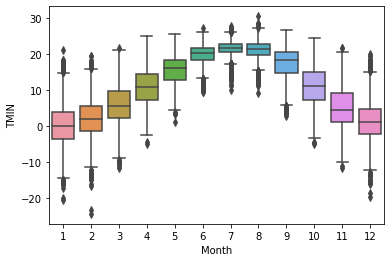

In [219]:
sns.boxplot(data= df_final, x = 'Month', y = 'TMIN')
plt.show()

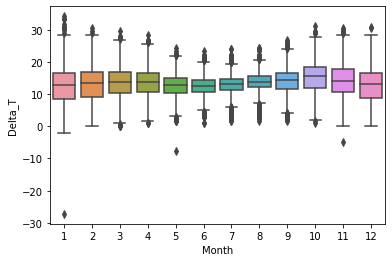

In [220]:
sns.boxplot(data= df_final, x = 'Month', y = 'Delta_T')
plt.show()

**We observe a clear yearly seasonality. It is also intersting to mention that the temperature difference within a day of summer is smaller than that value of winter**

# Predicting future temperature using fbprophet

In [280]:
from fbprophet import Prophet

In [281]:
def future_temperature(temp = 'TMAX'):
    df = pd.DataFrame({'ds': df_final.index,
                       'y': df_final.loc[:, temp]})
    df = df.iloc[2000:, :]
    m = Prophet(daily_seasonality=False, weekly_seasonality = False, yearly_seasonality = True,
               growth = 'linear',
               seasonality_mode = 'multiplicative')
    m.fit(df)
    future = m.make_future_dataframe(periods=365*15)
    forecast = m.predict(future)
    m.plot(forecast)
    plt.xlim([datetime.date(1990, 1, 26), datetime.date(2033, 2, 1)])
    plt.show()

## Maximum temperature

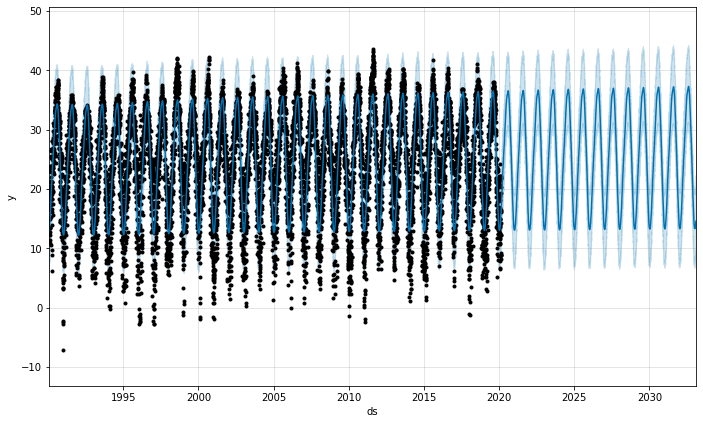

In [282]:
future_temperature(temp = 'TMAX')

## Minimum temperature

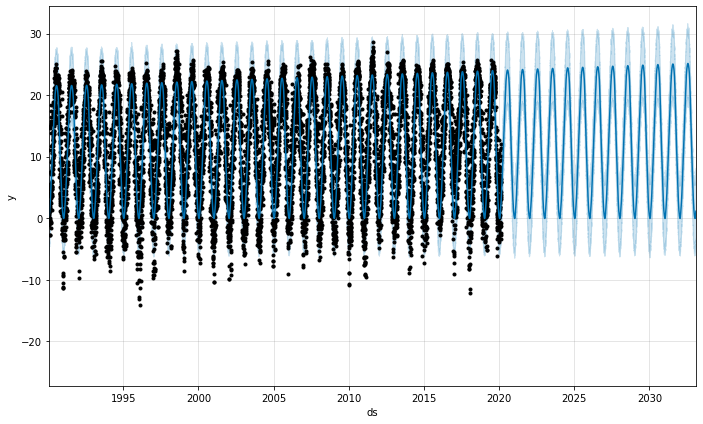

In [279]:
future_temperature(temp = 'TMIN')

# Summary and suggestions for WorlCover
- By analysing the maximum and the minimum temperature, we can conclude that the temperature increases gradually in Texas, US. That is because of the global warming.   
- If a famer in Texas would like to by agricultural insurance I would suggest WorldCover to give them some discount. The temperature range in Texas , which is from -10 to 42, is very good for crops. From the prediction, in the next 15 years, it is even beter for crops. 
- However, temperature is the only one condition to consider if the climate is good or not for agriculture.To have a full picture, we need to analyse data of wind, snow, rainfall, natural disasters, etc.